In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv("flood_monitoring_dataset.csv")

# Features and target
X = df.drop("flood_occurred", axis=1)
y = df["flood_occurred"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest with balanced class weight
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.64
Confusion Matrix:
 [[119  46]
 [ 26   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       165
           1       0.16      0.26      0.20        35

    accuracy                           0.64       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.71      0.64      0.67       200



Accuracy: 0.64
[[119  46]
 [ 26   9]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       165
           1       0.16      0.26      0.20        35

    accuracy                           0.64       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.71      0.64      0.67       200



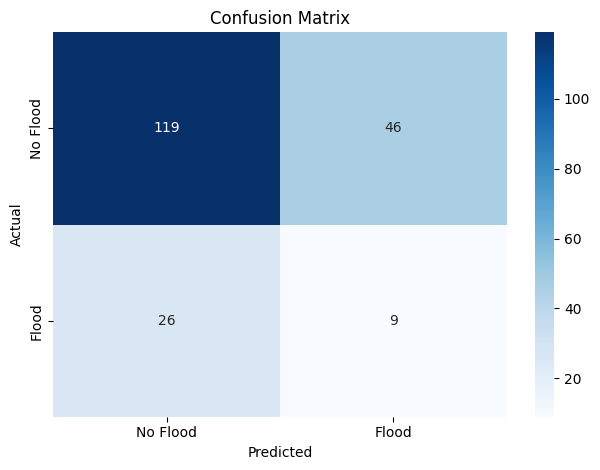

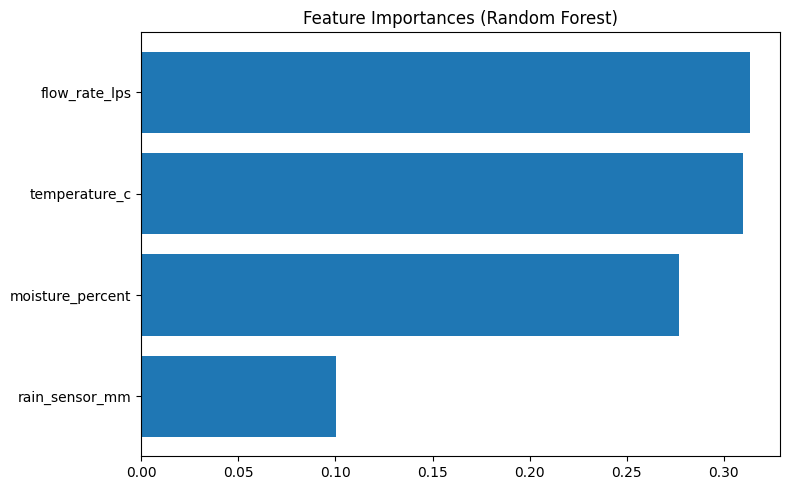

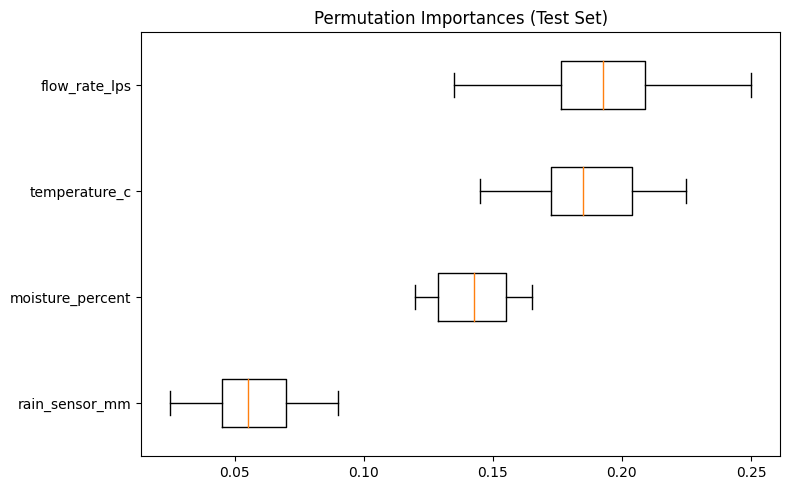

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("flood_monitoring_dataset.csv")
X = df.drop("flood_occurred", axis=1)
y = df["flood_occurred"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
def plot_confusion_matrix(cm, labels):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ["No Flood", "Flood"])

# Feature Importance Plot
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()

plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.tight_layout()
plt.show()

# Permutation Importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8, 5))
plt.boxplot(result.importances[sorted_idx].T, vert=False,
            labels=[features[i] for i in sorted_idx])
plt.title("Permutation Importances (Test Set)")
plt.tight_layout()
plt.show()
